# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import requests
import seaborn as sns

import scipy
import scipy.optimize as op
from scipy.stats import linregress
from scipy.optimize import curve_fit
from scipy import stats

from datetime import date, timedelta
import datetime

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from sklearn.covariance import EmpiricalCovariance, MinCovDet

import dask.dataframe as dd

from pylab import rcParams
rcParams['figure.figsize'] = 12, 10
rcParams['pdf.fonttype'] = 42
inline_rc = dict(plt.rcParams)

#from matplotlib.pyplot import cm 
import platform
import sys
import glob
import io
import os

In [2]:
import ec

# Import Data

In [5]:
dfs = {}
i=0
fileplace = "G:/Shared drives/UGS_Groundwater/Projects/Juab_Valley/Climate/ET_EddyCovariance/Data_Downloads/Juab/combined_farm/"
for file in glob.glob(fileplace+"*Time_Series*"):
    print(file)
    df = dd.read_csv(file,skiprows=[0,2,3],na_values=['NAN'],dtype={'diag_csat': 'float64'},
                 parse_dates=True).set_index('TIMESTAMP')
    #df['Pr'] = 86000

    df.index = df.index.astype('M8[ns]')
    dfs[i] = df.compute()
    i+=1

G:/Shared drives/UGS_Groundwater/Projects/Juab_Valley/Climate/ET_EddyCovariance/Data_Downloads/Download_2019_03_12\TOA5_8441_Time_Series_1.dat
G:/Shared drives/UGS_Groundwater/Projects/Juab_Valley/Climate/ET_EddyCovariance/Data_Downloads/Download_2019_03_12\TOA5_8441_Time_Series_2.dat
G:/Shared drives/UGS_Groundwater/Projects/Juab_Valley/Climate/ET_EddyCovariance/Data_Downloads/Download_2019_03_12\TOA5_8441_Time_Series_3.dat
G:/Shared drives/UGS_Groundwater/Projects/Juab_Valley/Climate/ET_EddyCovariance/Data_Downloads/Download_2019_03_12\TOA5_8441_Time_Series_4.dat
G:/Shared drives/UGS_Groundwater/Projects/Juab_Valley/Climate/ET_EddyCovariance/Data_Downloads/Download_2019_03_12\TOA5_8441_Time_Series_5.dat
G:/Shared drives/UGS_Groundwater/Projects/Juab_Valley/Climate/ET_EddyCovariance/Data_Downloads/Download_2019_03_12\TOA5_8441_Time_Series_6.dat
G:/Shared drives/UGS_Groundwater/Projects/Juab_Valley/Climate/ET_EddyCovariance/Data_Downloads/Download_2019_03_12\TOA5_8441_Time_Series_7.dat

In [28]:
import dask.dataframe as dd
fileplace = "C:/Users/paulinkenbrandt/Documents/Projects/Juab/20210622_farm_processed/"
file= fileplace + "*Time_Series_290.dat"
df = dd.read_csv(file,skiprows=[0,2,3],na_values=['NAN'],dtype={'diag_csat': 'float64'},
                 parse_dates=True).set_index('TIMESTAMP')
#df['Pr'] = 86000

df.index = df.index.astype('M8[ns]')
df = df.compute()
df['TA_1_1_1'] = df['TA_1_1_1'] + 23 
df['T_SONIC'] = df['TA_1_1_1']
#df = df.loc[pd.to_datetime("2009-05-27 16:00:00.000"):]

In [29]:
df.head()

,RECORD,Ux,Uy,Uz,T_SONIC,diag_sonic,volt_KH20,diag_kh20,amb_press,TA_1_1_1,RH_1_1_1,FW
TIMESTAMP,,,,,,,,,,,,
2021-06-14 00:00:00.100,245827970,4.980349,-3.585071,-0.376115,31.569908,0,34.73232,0,49.94021,31.569908,12.12791,NaN
2021-06-14 00:00:00.200,245827971,5.136191,-3.499528,-0.504765,31.566185,0,35.63925,0,49.94020,31.566185,12.12012,NaN
2021-06-14 00:00:00.300,245827972,5.294898,-2.926585,-0.918012,31.544762,0,34.99607,0,49.93660,31.544762,12.12461,NaN
2021-06-14 00:00:00.400,245827973,5.029508,-2.619484,-0.593327,31.560478,0,34.75459,0,49.92876,31.560478,12.12626,NaN
2021-06-14 00:00:00.500,245827974,4.909807,-2.949019,-0.766270,31.576233,0,34.93779,0,49.92938,31.576233,12.12276,NaN


# Using the Class

In [25]:
fluxcalc = ec.CalcFluxWithKH20()

In [8]:
#dfsm = df.loc[pd.to_datetime("2009-05-27 16:00:00.000"):pd.to_datetime("2009-05-27 17:00:00.000")]

In [7]:
agmet = pd.read_csv(r"C:\Users\paulinkenbrandt\Downloads\UCC_scan_2137_2021_06_08_1623185624\UCC_scan_2137_2021_06_08_1623185624.csv",
            skiprows=14,na_values=['M','S'],index_col='Day',parse_dates=True)


C:\Users\paulinkenbrandt\.conda\envs\pygis39\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname MST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [31]:
df['Ta_K'] = fluxcalc.convert_CtoK(df['TA_1_1_1'])

<AxesSubplot:xlabel='TIMESTAMP'>

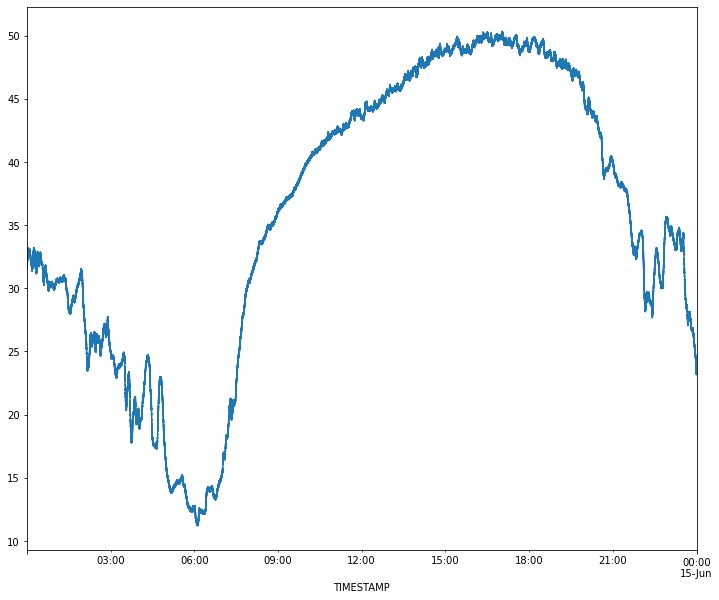

In [34]:
df['Ta_C'] = fluxcalc.convert_KtoC(df['Ta_K'])
df['Ta_C'].plot()

In [30]:
outdf = {}
for i, g in df.groupby(pd.Grouper(freq='1H')):
    outdf[g.first_valid_index()] = fluxcalc.runall(g)
    print(g.first_valid_index())
    print(outdf[g.first_valid_index()])
    #print(i)

G:\My Drive\Python\Pycharm\MicroMet\ec.py:174: RuntimeWarning: invalid value encountered in sqrt
  StDevTa = np.sqrt(CovTs_Ts - 1.02 * df['Ts'].mean() * CovTs_Q - 0.2601 * QMSE * df['Ts'].mean()**2)


2021-06-14 00:00:00.100000
Ta          -264.656450
Td           -19.702826
D           -128.945297
Ustr           0.287840
zeta          23.851167
H             -9.392055
StDevUz        0.335854
StDevTa             NaN
direction    197.711613
exchange      -6.856075
lambdaE     -137.541783
ET            -0.004599
Uxy            4.688926
dtype: float64
2021-06-14 01:00:00
Ta          -263.959940
Td           -19.727427
D           -128.673120
Ustr           0.287332
zeta          19.618621
H             -7.691986
StDevUz        0.325100
StDevTa             NaN
direction    197.191048
exchange       8.845215
lambdaE     -112.785248
ET            -0.003783
Uxy            4.220911
dtype: float64
2021-06-14 02:00:00
Ta          -261.781061
Td           -19.806437
D           -127.802450
Ustr           0.243579
zeta          46.246937
H            -10.970191
StDevUz        0.296597
StDevTa             NaN
direction    216.378376
exchange     -64.697553
lambdaE     -160.221238
ET            -

C:\Users\paulinkenbrandt\.conda\envs\pygis39\lib\site-packages\pandas\core\frame.py:8525: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\paulinkenbrandt\.conda\envs\pygis39\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\paulinkenbrandt\.conda\envs\pygis39\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


2021-06-15 00:00:00
Ta          -259.902402
Td           -19.868884
D           -127.118034
Ustr                NaN
zeta                NaN
H                   NaN
StDevUz             NaN
StDevTa             NaN
direction    309.692799
exchange            NaN
lambdaE             NaN
ET                  NaN
Uxy            2.167230
dtype: float64


<AxesSubplot:>

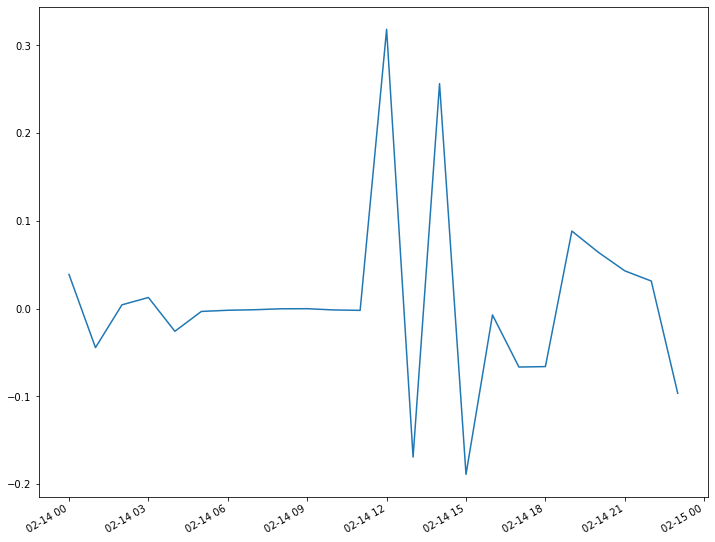

In [13]:
pd.concat(outdf,axis=1).T['ET'].plot()#.to_clipboardboard()

In [9]:
pd.concat(outdf,axis=1).T.to_csv("G:/My Drive/Python/Pycharm/MicroMet/output.csv")#.reset_index().set_index('Firstdate')

# Step by Step

## Constants

In [12]:
Rv = 461.51 # 'Water Vapor Gas Constant', 'J/[kg*K]'
Ru = 8.314 # 'Universal Gas Constant', 'J/[kg*K]'
Cpd = 1005 # 'Specific Heat of Dry Air', 'J/[kg*K]'
Rd = 287.05 # 'Dry Air Gas Constant', 'J/[kg*K]'
Co = 0.21  # Molar Fraction of Oxygen in the Atmosphere
Mo = 0.032  # Molar Mass of Oxygen (gO2/mole)

XKH20 = 1.412 # 'Path Length of KH20', 'cm'
XKwC1 = -0.152214126 # First Order Coefficient in Vapor Density-KH20 Output Relationship, cm
XKwC2 = -0.001667836 # Second Order Coefficient in Vapor Density-KH20 Output Relationship, cm
directionKH20_U = 180
UHeight = 3 # Height of Sonic Anemometer above Ground Surface', 'm'
PathKH20_U = 0.1 # Separation Distance Between Sonic Anemometer and KH20', 'm', 0.1
lag = 10 # number of lags to consider
direction_bad_min = 0 # Clockwise Orientation from DirectionKH20_U
direction_bad_max = 360 # Clockwise Orientation from DirectionKH20_U

Kw = 1 # Extinction Coefficient of Water (m^3/[g*cm]) -instrument calibration
Ko = -0.0045 # Extinction Coefficient of Oxygen (m^3/[g*cm]) -derived experimentally

## Despike

In [13]:
def despike(arr, nstd=4.5):
    """Removes spikes from parameter within a specified deviation from the mean.
    """
    stdd = np.nanstd(arr) * nstd
    avg = np.nanmean(arr)
    avgdiff = stdd - np.abs(arr - avg)
    y = np.where(avgdiff >= 0, arr, np.NaN)
    nans, x = np.isnan(y), lambda z: z.nonzero()[0]
    if len(x(~nans)) > 0:
        y[nans] = np.interp(x(nans), x(~nans), y[~nans])
    return y

In [14]:
def renamedf(df):
    return df.rename(columns={'T_SONIC':'Ts',
                              'TA_1_1_1':'Ta',
                              'amb_press':'Pr',
                              'RH_1_1_1':'Rh',
                              't_hmp':'Ta',
                              'e_hmp':'Ea',
                              'kh':'volt_KH20'
                              })

In [15]:
#dfsm = df.loc[pd.to_datetime("2009-05-27 16:00:00.000"):pd.to_datetime("2009-05-27 17:00:00.000")]

In [16]:
dfsm = renamedf(df)

despikefields = ['Ux', 'Uy', 'Uz', 'Ts', 'LnKH', 'Pr', 'Ta', 'Rh']

dfsm['LnKH'] = np.log(dfsm['volt_KH20'].to_numpy())


for col in despikefields:
    if col in dfsm.columns:
        dfsm[col] = despike(dfsm[col].to_numpy(), nstd=4.5)

## CSAT Correction

In [17]:
def fix_csat(Ux, Uy, Uz):

    CSAT3Inverse = [[-0.5, 0, 0.86602540378444],
                    [0.25, 0.4330127018922, 0.86602540378444],
                    [0.25, -0.4330127018922, 0.86602540378444]]
    CSAT3Transform = [[-1.3333333333333, 0.66666666666666, 0.66666666666666],
                      [0, 1.1547005383792, -1.1547005383792],
                      [0.3849001794597, 0.3849001794597, 0.3849001794597]]

    Ux_out = []
    Uy_out = []
    Uz_out = []

    for i in range(len(Ux)):
        u = {}
        u[0] = CSAT3Inverse[0][0] * Ux[i] + CSAT3Inverse[0][1] * Uy[i] + CSAT3Inverse[0][2] * Uz[i]
        u[1] = CSAT3Inverse[1][0] * Ux[i] + CSAT3Inverse[1][1] * Uy[i] + CSAT3Inverse[1][2] * Uz[i]
        u[2] = CSAT3Inverse[2][0] * Ux[i] + CSAT3Inverse[2][1] * Uy[i] + CSAT3Inverse[2][2] * Uz[i]

        scalar = (Ux[i] ** 2. + Uy[i] ** 2. + Uz[i] ** 2.) ** 0.5

        u[0] = u[0] / (0.68 + 0.32 * np.sin(np.arccos(u[0] / scalar)))
        u[1] = u[1] / (0.68 + 0.32 * np.sin(np.arccos(u[1] / scalar)))
        u[2] = u[2] / (0.68 + 0.32 * np.sin(np.arccos(u[2] / scalar)))

        Ux_out.append(CSAT3Transform[0][0] * u[0] + CSAT3Transform[0][1] * u[1] + CSAT3Transform[0][2] * u[2])
        Uy_out.append(CSAT3Transform[1][0] * u[0] + CSAT3Transform[1][1] * u[1] + CSAT3Transform[1][2] * u[2])
        Uz_out.append(CSAT3Transform[2][0] * u[0] + CSAT3Transform[2][1] * u[1] + CSAT3Transform[2][2] * u[2])

    return Ux_out, Uy_out, Uz_out

In [18]:
def convert_KtoC(T):
    return T - 273.16

def convert_CtoK(T):
    return T + 273.16

In [19]:
dfsm['Ts'] = convert_CtoK(dfsm['Ts'].to_numpy())

dfsm['Ux'],dfsm['Uy'],dfsm['Uz'] = fix_csat(dfsm['Ux'].to_numpy(),
                                           dfsm['Uy'].to_numpy(),
                                           dfsm['Uz'].to_numpy())

<AxesSubplot:xlabel='TIMESTAMP'>

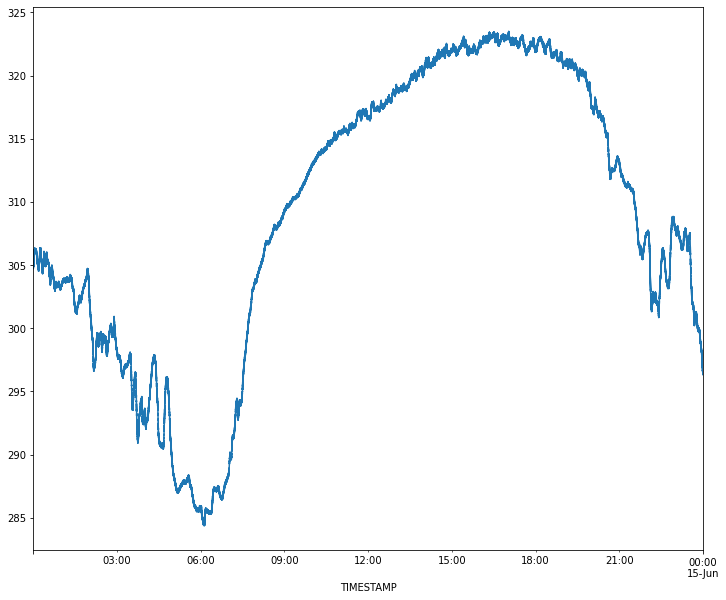

In [20]:
dfsm['Ts'].plot()

## Weather Parameters

In [21]:
def calculated_parameters(df):
    df['pV'] = calc_pV(df['Ea'], df['Ts'])
    df['Tsa'] = calc_Tsa(df['Ts'], df['Pr'], df['pV'])
    df['E'] = calc_E(df['pV'], df['Tsa'])
    df['Q'] = calc_Q(df['Pr'], df['E'])
    df['Sd'] = calc_Q(df['Pr'], calc_Es(df['Tsa'])) - df['Q']
    return df

def calc_pV(Ea, Ts):
    return (Ea * 1000.0) / (Rv * Ts)

def calc_Tsa(Ts, P, pV, Rv=461.51):
    E = pV * Rv * Ts
    return -0.01645278052 * (
                -500 * P - 189 * E + np.sqrt(250000 * P ** 2 + 128220 * E * P + 35721 * E ** 2)) / pV / Rv

def calc_E(pV, T):
    return pV * Rv * T

def calc_Q(P, E):
    return (0.622 * E) / (P - 0.378 * E)

def calc_Es(T):
    g0 = -2836.5744
    g1 = -6028.076559
    g2 = 19.54263612
    g3 = -0.02737830188
    g4 = 0.000016261698
    g5 = 0.00000000070229056
    g6 = -0.00000000000018680009
    g7 = 2.7150305

    return np.exp(
        g0 * T ** (-2) + g1 * T ** (-1) + g2 + g3 * T + g4 * T ** 2 + g5 * T ** 3 + g6 * T ** 4 + g7 * np.log(T))

In [22]:
dfsm = calculated_parameters(dfsm)

KeyError: 'Ea'

## Calculate the Correct XKw Value for KH20

In [31]:
XKw = XKwC1 + 2 * XKwC2 * (dfsm['pV'].mean() * 1000.)
Kw = XKw / XKH20

## Covariances

### regular covariance

In [32]:
CovTs_Ts = dfsm[['Ts', 'Ts']].cov().iloc[0,0] # location index needed because of same fields
CovUx_Uy = dfsm[['Ux', 'Uy']].cov().loc['Ux', 'Uy']  # CalcCovariance(IWP.Ux, IWP.Uy)
CovUx_Uz = dfsm[['Ux', 'Uz']].cov().loc['Ux', 'Uz']  # CalcCovariance(IWP.Ux, IWP.Uz)
CovUy_Uz = dfsm[['Uy', 'Uz']].cov().loc['Uy', 'Uz']  # CalcCovariance(IWP.Uy, IWP.Uz)

In [33]:
print(f"CovTs_Ts = {CovTs_Ts}") 
print(f"CovUx_Uy = {CovUx_Uy}")
print(f"CovUx_Uz = {CovUx_Uz}")
print(f"CovUy_Uz = {CovUy_Uz}")

CovTs_Ts = 0.07064076201818181
CovUx_Uy = 0.23705990519123227
CovUx_Uz = 0.004523740457045727
CovUy_Uz = -0.17724196577590595


0.24682559155736247, ux_uy

In [34]:
covdata = dfsm[['Ux', 'Uy']].to_numpy()

# fit a MCD robust estimator to data
robust_cov = MinCovDet().fit(covdata)
# fit a MLE estimator to data
emp_cov = EmpiricalCovariance().fit(covdata)
print('Estimated covariance matrix:\n'
      'MCD (Robust):\n{}\n'
      'MLE:\n{}'.format(robust_cov.covariance_, emp_cov.covariance_))

Estimated covariance matrix:
MCD (Robust):
[[0.93628763 0.33968448]
 [0.33968448 1.5743863 ]]
MLE:
[[1.26745461 0.23705332]
 [0.23705332 1.92521684]]


### Max covariance

In [35]:
def calc_max_covariance(df, colx, coly, lags=10):
    dfcov = []
    for i in np.arange(-1 * lags, lags):

        df[f"{coly}_{i}"] = df[coly].shift(i)
        dfcov.append(df[[colx, f"{coly}_{i}"]].cov().loc[colx, f"{coly}_{i}"])
        #print(i,df[[colx, f"{coly}_{i}"]].cov().loc[colx, f"{coly}_{i}"])
        df = df.drop([f"{coly}_{i}"], axis=1)

    abscov = np.abs(dfcov)
    maxabscov = np.max(abscov)
    try:
        print(np.where(abscov == maxabscov)[0])
        maxlagindex = np.where(abscov == maxabscov)[0][0]
        lagno = maxlagindex - lags
        maxcov = dfcov[maxlagindex]
    except IndexError:
        lagno = 0
        maxcov = dfcov[10]
    return maxcov, lagno

In [36]:
lag = 10
CovTs_Q = calc_max_covariance(dfsm, 'Ts', 'Q', lag)[0]
CovUx_LnKH = calc_max_covariance(dfsm, 'Ux', 'LnKH', lag)[0]
CovUx_Q = calc_max_covariance(dfsm, 'Ux', 'Q', lag)[0]
CovUx_Sd = calc_max_covariance(dfsm, 'Ux', 'Sd', lag)[0]
CovUx_Ts = calc_max_covariance(dfsm, 'Ux', 'Ts', lag)[0]
CovUy_LnKH = calc_max_covariance(dfsm, 'Uy', 'LnKH', lag)[0]
CovUy_Q = calc_max_covariance(dfsm, 'Uy', 'Q', lag)[0]
CovUy_Sd = calc_max_covariance(dfsm, 'Uy', 'Sd', lag)[0]
CovUy_Ts = calc_max_covariance(dfsm, 'Uy', 'Ts', lag)[0]
CovUz_LnKH = calc_max_covariance(dfsm, 'Uz', 'LnKH', lag)[0]
CovUz_Q = calc_max_covariance(dfsm, 'Uz', 'Q', lag)[0]
CovUz_Sd = calc_max_covariance(dfsm, 'Uz', 'Sd', lag)[0]
CovUz_Ts = calc_max_covariance(dfsm, 'Uz', 'Ts', lag)[0]

[19]
[9]
[0]
[10]
[10]
[10]
[8]
[9]
[0]
[10]
[11]
[11]
[10]


In [37]:
print(f"CovTs_Q = {CovTs_Q}") 
print(f"CovUx_LnKH = {CovUx_LnKH}")
print(f"CovUx_Q = {CovUx_Q}")
print(f"CovUx_Sd = {CovUx_Sd}")
print(f"CovUx_Ts = {CovUx_Ts}")
print(f"CovUy_LnKH = {CovUy_LnKH}")
print(f"CovUy_Q = {CovUy_Q}")
print(f"CovUy_Sd = {CovUy_Sd}")
print(f"CovUy_Ts = {CovUy_Ts}")
print(f"CovUz_LnKH = {CovUz_LnKH}")

CovTs_Q = 2.6988572225757985e-05
CovUx_LnKH = -0.0063005465373859836
CovUx_Q = 2.1757598999650003e-05
CovUx_Sd = -7.645342713314233e-05
CovUx_Ts = -0.04646998062382586
CovUy_LnKH = 0.10860722132220826
CovUy_Q = -0.00037125529443951153
CovUy_Sd = 0.00035091036903631145
CovUy_Ts = -0.0784617900114158
CovUz_LnKH = -0.029794698347107507


In [38]:
calc_max_covariance(dfsm, 'Ux', 'Sd', lag)

[10]


(-7.645342713314233e-05, 0)

## Coordinate Rotation

In [39]:
def coord_rotation(df, Ux='Ux', Uy='Uy', Uz='Uz'):
    """Traditional Coordinate Rotation
    """
    xmean = df[Ux].mean()
    ymean = df[Uy].mean()
    zmean = df[Uz].mean()
    Uxy = np.sqrt(xmean ** 2 + ymean ** 2)
    Uxyz = np.sqrt(xmean ** 2 + ymean ** 2 + zmean ** 2)
    cosν = xmean / Uxy
    sinν = ymean / Uxy
    sinTheta = zmean / Uxyz
    cosTheta = Uxy / Uxyz
    return cosν, sinν, sinTheta, cosTheta, Uxy, Uxyz

In [40]:
# Traditional Coordinate Rotation
cosν, sinν, sinTheta, cosTheta, Uxy, Uxyz = coord_rotation(dfsm)

## Mean Squared Error

In [41]:
def calc_MSE(y):
    return np.mean((y - np.mean(y)) ** 2)

In [42]:
# Find the Mean Squared Error of Velocity Components and Humidity
UxMSE = calc_MSE(dfsm['Ux'])
UyMSE = calc_MSE(dfsm['Uy'])
UzMSE = calc_MSE(dfsm['Uz'])
QMSE = calc_MSE(dfsm['Q'])

## Correct Covariances for Coordinate Rotation

In [43]:

Uz_Ts = CovUz_Ts * cosTheta - CovUx_Ts * sinTheta * cosν - CovUy_Ts * sinTheta * sinν
if np.abs(Uz_Ts) >= np.abs(CovUz_Ts):
    CovUz_Ts = Uz_Ts

Uz_LnKH = CovUz_LnKH * cosTheta - CovUx_LnKH * sinTheta * cosν - CovUy_LnKH * sinν * sinTheta
if np.abs(Uz_LnKH) >= np.abs(CovUz_LnKH):
    CovUz_LnKH = Uz_LnKH
CovUx_Q = CovUx_Q * cosTheta * cosν + CovUy_Q * cosTheta * sinν + CovUz_Q * sinTheta
CovUy_Q = CovUy_Q * cosν - CovUx_Q * sinν
CovUz_Q = CovUz_Q * cosTheta - CovUx_Q * sinTheta * cosν - CovUy_Q * sinν * sinTheta
CovUx_Uz = CovUx_Uz * cosν * (cosTheta**2 - sinTheta**2) - 2 * CovUx_Uy * sinTheta * cosTheta * sinν * cosν + CovUy_Uz * sinν * (cosTheta**2 - sinTheta**2) - UxMSE * sinTheta * cosTheta * cosν**2 - UyMSE * sinTheta * cosTheta * sinν**2 + UzMSE * sinTheta * cosTheta
CovUy_Uz = CovUy_Uz * cosTheta * cosν - CovUx_Uz * cosTheta * sinν - CovUx_Uy * sinTheta * (cosν**2 - sinν**2) + UxMSE * sinTheta * sinν * cosν - UyMSE * sinTheta * sinν * cosν
CovUz_Sd = CovUz_Sd * cosTheta - CovUx_Sd * sinTheta * cosν - CovUy_Sd * sinν * sinTheta
Uxy_Uz = np.sqrt(CovUx_Uz**2 + CovUy_Uz**2)
Ustr = np.sqrt(Uxy_Uz)

## Find Average Air Temperature From Average Sonic Temperature

In [44]:
def calc_Tsa(Ts, P, pV, Rv=461.51):
    E = pV * Rv * Ts
    return -0.01645278052 * (
                -500 * P - 189 * E + np.sqrt(250000 * P ** 2 + 128220 * E * P + 35721 * E ** 2)) / pV / Rv

In [45]:
Tsa = calc_Tsa(dfsm['Ts'].mean(), dfsm['Pr'].mean(), dfsm['pV'].mean())

## Calculate the Latent Heat of Vaporization

In [47]:
lamb = (2500800 - 2366.8 * (convert_KtoC(Tsa)))

## Determine Vertical Wind and Water Vapor Density Covariance

In [48]:
Uz_pV = (CovUz_LnKH / XKw) / 1000

## Calculate the Correct Average Values of Some Key Parameters

In [51]:
Cp = Cpd * (1 + 0.84 * dfsm['Q'].mean())
pD = (dfsm['Pr'].mean() - dfsm['E'].mean()) / (Rd * Tsa)
p = pD + dfsm['pV'].mean()

In [ ]:
##

In [65]:
StDevTa = np.sqrt(CovTs_Ts - 1.02 * dfsm['Ts'].mean() * CovTs_Q - 0.2601 * QMSE * dfsm['Ts'].mean()**2)
Uz_Ta = CovUz_Ts - 0.07 * lamb * Uz_pV / (p * Cp)


## Determine Saturation Vapor Pressure of the Air Using Highly Accurate Wexler's Equations Modified by Hardy

In [54]:
def calc_Td(E):
    c0 = 207.98233
    c1 = -20.156028
    c2 = 0.46778925
    c3 = -0.0000092288067
    d0 = 1
    d1 = -0.13319669
    d2 = 0.0056577518
    d3 = -0.000075172865
    lne = np.log(E)
    return (c0 + c1 * lne + c2 * lne ** 2 + c3 * lne ** 3) / (d0 + d1 * lne + d2 * lne ** 2 + d3 * lne ** 3)

def calc_Es(T):
    g0 = -2836.5744
    g1 = -6028.076559
    g2 = 19.54263612
    g3 = -0.02737830188
    g4 = 0.000016261698
    g5 = 0.00000000070229056
    g6 = -0.00000000000018680009
    g7 = 2.7150305

    return np.exp(g0 * T ** (-2) + g1 * T ** (-1) + g2 + g3 * T + g4 * T ** 2 + g5 * T ** 3 + g6 * T ** 4 + g7 * np.log(T))

def calc_Q(P, E):
    return (0.622 * E) / (P - 0.378 * E)


In [55]:
Td = calc_Td(dfsm['E'].mean())
D = calc_Es(Tsa) - dfsm['E'].mean()
S = (calc_Q(dfsm['Pr'].mean(), calc_Es(Tsa + 1)) - calc_Q(dfsm['Pr'].mean(), calc_Es(Tsa - 1))) / 2

## Determine Wind Direction

In [56]:

WindDirection = np.arctan(df['Uy'].mean() / df['Ux'].mean()) * 180 / np.pi
if df['Ux'].mean() < 0:
    WindDirection += 180 * np.sign(df['Uy'].mean())

In [57]:

direction = directionKH20_U - WindDirection

if direction < 0:
    direction += 360

## Calculate the Lateral Separation Distance Projected Into the Mean Wind Direction

In [58]:
pathlen = PathKH20_U * np.abs(np.sin((np.pi / 180) * direction))

## Calculate the Average and Standard Deviations of the Rotated Velocity Components

In [61]:
StDevUz = dfsm['Uz'].std()
UMean = dfsm['Ux'].mean() * cosTheta * cosν + dfsm['Uy'].mean() * cosTheta * sinν + dfsm['Uz'].mean() * sinTheta

## Frequency Response Corrections (Massman, 2000 & 2001)

In [62]:
tauB = (3600) / 2.8
tauEKH20 = np.sqrt((0.01 / (4 * UMean)) **2 + (pathlen / (1.1 * UMean))**2)
tauETs = np.sqrt((0.1 / (8.4 * UMean))**2)
tauEMomentum = np.sqrt((0.1 / (5.7 * UMean))**2 + (0.1 / (2.8 * UMean))**2)

## Calculate ζ and Correct Values of Uᕽ and Uz_Ta

In [63]:
def calc_L(Ust, Tsa, Uz_Ta):
    #removed negative sign
    return -1*(Ust ** 3) * Tsa / (9.8 * 0.4 * Uz_Ta)

def calc_AlphX(UHeight, L):
    if (UHeight / L) <= 0:
        alph = 0.925
        X = 0.085
    else:
        alph = 1
        X = 2 - 1.915 / (1 + 0.5 * UHeight / L)
    return alph, X

def correct_spectral(B, alpha, varib):
    B_alpha = B ** alpha
    V_alpha = varib ** alpha
    return (B_alpha / (B_alpha + 1)) * (B_alpha / (B_alpha + V_alpha)) * (1 / (V_alpha + 1))

In [66]:
L = calc_L(Ustr, Tsa, Uz_Ta)
alpha, X = calc_AlphX(UHeight, L)
fX = X * UMean / UHeight
B = 2 * np.pi * fX * tauB
momentum = 2 * np.pi * fX * tauEMomentum
_Ts = 2 * np.pi * fX * tauETs
_KH20 = 2 * np.pi * fX * tauEKH20
Ts = correct_spectral(B, alpha, _Ts)
Uxy_Uz /= correct_spectral(B, alpha, momentum)
Ustr = np.sqrt(Uxy_Uz)

## Recalculate L With New Uᕽ and Uz_Ta, and Calculate High Frequency Corrections

In [68]:
L = calc_L(Ustr, Tsa, Uz_Ta / Ts)
alpha, X = calc_AlphX(UHeight, L)
Ts = correct_spectral(B, alpha, _Ts)
KH20 = correct_spectral(B, alpha, _KH20)

## Correct the Covariance Values

In [71]:
Uz_Ta /= Ts
Uz_pV /= KH20
Uxy_Uz /= correct_spectral(B, alpha, momentum)
Ustr = np.sqrt(Uxy_Uz)
CovUz_Sd /= KH20
exchange = ((p * Cp) / (S + Cp / lamb)) * CovUz_Sd

## KH20 Oxygen Correction

In [74]:
def correct_KH20(Uz_Ta, P, T, Mo, Co, Ru, Ko, Kw):
    """Calculates an additive correction for the KH20 due to cross sensitivity between H20 and 02 molecules.
    Uz_Ta = Covariance of Vertical Wind Component and Air Temperature (m*K/s)
    P = Air Pressure (Pa)
    T = Air Temperature (K)
    Kw = Extinction Coefficient of Water (m^3/[g*cm]) -instrument calibration
    Ko = Extinction Coefficient of Oxygen (m^3/[g*cm]) -derived experimentally
    returns KH20 Oxygen Correction
    """
    return ((Co * Mo * P) / (Ru * T ** 2)) * (Ko / Kw) * Uz_Ta

In [78]:
Uz_pV += correct_KH20(Uz_Ta, dfsm['Pr'].mean(), Tsa, Mo, Co, Ru, Ko, Kw)

## Calculate New H and LE Values

In [79]:

H = p * Cp * Uz_Ta
lambdaE = lamb * Uz_pV

## Webb, Pearman and Leuning Correction

In [80]:
lambdaE = lamb * p * Cp * Tsa * (1.0 + (1.0 / 0.622) * (dfsm['pV'].mean() / pD)) * (Uz_pV + (dfsm['pV'].mean() / Tsa) * Uz_Ta) / (p * Cp * Tsa + lamb * (1.0 + (1 / 0.622) * (dfsm['pV'].mean() / pD)) * dfsm['pV'].mean() * 0.07)

## Finish Output

In [83]:
def calc_water_density(temperature):
    d1 = -3.983035  # °C
    d2 = 301.797  # °C
    d3 = 522528.9  # °C2
    d4 = 69.34881  # °C
    d5 = 999.97495  # kg/m3
    return d5 * (1 - (temperature + d1) ** 2 * (temperature + d2) / (d3 * (temperature + d4)))  # 'kg/m^3

def calc_latent_heat_of_vaporization(temperature):
    l0 = 2500800
    l1 = -2360
    l2 = 1.6
    l3 = -0.06
    return l0 + l1 * temperature + l2 * temperature ** 2 + l3 * temperature ** 3  # 'J/kg

def get_Watts_to_H2O_conversion_factor(temperature, day_fraction):
    to_inches = 25.4
    return (calc_water_density(temperature) * 86.4 * day_fraction) / (
            calc_latent_heat_of_vaporization(temperature) * to_inches)



In [84]:
Tsa = convert_KtoC(Tsa)
Td = convert_KtoC(Td)
zeta = UHeight / L
ET = lambdaE * get_Watts_to_H2O_conversion_factor(Tsa, (dfsm.last_valid_index() - dfsm.first_valid_index())/ pd.to_timedelta(1, unit='D'))
#'Out.Parameters = CWP
columns = ['Ta','Td','D', 'Ustr', 'zeta', 'H', 'StDevUz', 'StDevTa',  'direction', 'exchange', 'lambdaE', 'ET', 'Uxy']
out = [Tsa, Td, D, Ustr, zeta, H, StDevUz, StDevTa,  direction, exchange,  lambdaE, ET, Uxy]
pd.Series(data=out,index=columns)

Ta             23.188007
Td              4.865331
D            1979.929389
Ustr            0.527603
zeta            0.009941
H             -37.058966
StDevUz         0.428887
StDevTa         0.216468
direction     118.360800
exchange      -48.227787
lambdaE       431.413364
ET              0.024934
Uxy             3.152308
dtype: float64

# Extra Equations

-7.4889559330869538E-05, ux_xd

## KH20 Conversions

KH20 Manual: https://s.campbellsci.com/documents/us/manuals/kh20.pdf

KH20 Calibration Params

In [ ]:
kh20sn = 1778
vapor_density_gpm3 = [1.76,3.06,4.17,5.45,6.82,8.07,9.20,10.48,11.82,13.02,14.19,15.49,16.83,17.72,18.08]
kh20_output_lnmv = [8.32,7.99,7.76,7.48,7.19,6.92,6.70,6.44,6.17,5.93,5.71,5.44,5.13,4.95,4.88]


import statsmodels.api as sm

y = vapor_density_gpm3
x = kh20_output_lnmv
X = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
intercept, slope = results.params
print(f"slope = {slope}\nintercept={intercept}")
plt.scatter(x,y)
plt.plot(x,[i*slope+intercept for i in x], color='red')

df['LnKH'] = np.log(df['volt_KH20'])
df['vap_density_gm3'] = df['LnKH']*slope + intercept

In [ ]:
parameters = {
    'Ea': ['Actual Vapor Pressure', 'kPa'],
    'LnKH': ['Natural Log of Krypton Hygrometer Output', 'mV'],
    'Pr': ['Air Pressure', 'Pa'],
    'Ta': ['Air Temperature', 'K'],
    'Ts': ['Sonic Temperature', 'K'],
    'Ux': ['X Component of Wind Speed', 'm/s'],
    'Uy': ['Y Component of Wind Speed', 'm/s'],
    'Uz': ['Z Component of Wind Speed', 'm/s'],
    'X': ['Path Length of KH20', 'cm', 1.412],
    'XKwC1': ['First Order Coefficient in Vapor Density-KH20 Output Relationship (lnMV = C0 + C1 * VD + C2 * VD ^ 2, Windows Clean/Full Vapor Range)','cm', -0.152214126],
    'XKwC2': ['Second Order Coefficient in Vapor Density-KH20 Output Relationship (lnMV = C0 + C1 * VD + C2 * VD ^ 2, Windows Clean/Full Vapor Range)','cm', -0.001667836],
    'DirectionKH20_U': ['Clockwise Orientation of Sonic Anemometer from Northern Azimuth (degrees)',180],
    'DirectionBadMin': ['Clockwise Orientation from DirectionKH20_U Where Unusable Wind Direction Data Begins','degrees', 0],
    'DirectionBadMax': ['Clockwise Orientation from DirectionKH20_U Where Unusable Wind Direction Data Ends','degrees', 0],
    'UHeight': ['Height of Sonic Anemometer above Ground Surface', 'm', 3],
    'PathKH20_U':['Separation Distance Between Sonic Anemometer and KH20', 'm', 0.1],
    'lag': ['Number of Shifts to Achieve Maximum Cross Correlation (Applied in Both Directions)','count', 10],
    'E':['Vapor Pressure','kPa'],
    'Q':['Specific Humidity','unitless'],'pV':['Water Vapor Density','kg/m^3'],
    'Sd':['Entropy of Dry Air','J/K'],
    'Tsa':['Absolute Air Temperature Derived from Sonic Temperature','K'], 
    
}